<h3 style='color:blue' align='center'>Occupancy prediction Using Artificial Neural Network (ANN)</h3>

Business Problem

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

**Load the data**

In [2]:
import pandas as pd
Occupancy = pd.read_csv('/content/datatraining.txt', delimiter = ",")
Occupancy

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


**First of all, drop customerID column as it is of no use**

In [3]:
Occupancy.drop('date',axis='columns',inplace=True)

In [4]:
Occupancy.dtypes

Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [5]:
Occupancy.any().isnull()

Temperature      False
Humidity         False
Light            False
CO2              False
HumidityRatio    False
Occupancy        False
dtype: bool

In [6]:
Occupancy.shape

(8143, 6)

In [7]:
Occupancy[Occupancy.Occupancy==0]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
17,23.000000,27.200,0.0,681.500000,0.004728,0
18,22.945000,27.290,0.0,685.000000,0.004728,0
19,22.945000,27.390,0.0,685.000000,0.004745,0
20,22.890000,27.390,0.0,689.000000,0.004730,0
21,22.890000,27.390,0.0,689.500000,0.004730,0
...,...,...,...,...,...,...
8085,20.290000,33.200,0.0,455.000000,0.004891,0
8086,20.290000,33.200,0.0,458.000000,0.004891,0
8087,20.315000,33.200,232.0,460.000000,0.004898,0
8090,20.315000,33.345,426.0,474.250000,0.004920,0


**Data Visualization**

In [8]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [9]:
print_unique_col_values(Occupancy)

**Train test split**

In [31]:
# X = Occupancy.drop('Occupancy',axis='columns')
# y = Occupancy['Occupancy']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_train = Occupancy.drop('Occupancy',axis='columns')
y_train = Occupancy['Occupancy']

In [32]:
import pandas as pd
Test = pd.read_csv('/content/datatest.txt', delimiter = ",")
Test

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [51]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

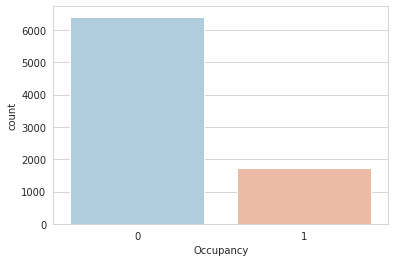

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='Occupancy',data=Occupancy,palette='RdBu_r')

In [33]:
Test.drop('date',axis='columns',inplace=True)

In [34]:
X_test = Test.drop('Occupancy',axis='columns')
y_test = Test['Occupancy']

In [35]:
X_train.shape

(8143, 5)

In [36]:
X_test.shape

(2665, 5)

In [37]:
X_train[:10]

,Temperature,Humidity,Light,CO2,HumidityRatio
1,23.180,27.2720,426.0,721.250000,0.004793
2,23.150,27.2675,429.5,714.000000,0.004783
3,23.150,27.2450,426.0,713.500000,0.004779
4,23.150,27.2000,426.0,708.250000,0.004772
5,23.100,27.2000,426.0,704.500000,0.004757
6,23.100,27.2000,419.0,701.000000,0.004757
7,23.100,27.2000,419.0,701.666667,0.004757
8,23.100,27.2000,419.0,699.000000,0.004757
9,23.100,27.2000,419.0,689.333333,0.004757
10,23.075,27.1750,419.0,688.000000,0.004745


In [ ]:
len(X_train.columns)

5

**Build a model (ANN) in tensorflow/keras**

In [14]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 4.3 MB/s 


In [38]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(5,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 26)                156       
                                                                 
 dense_7 (Dense)             (None, 15)                405       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [40]:
history=model.fit(X_train,y_train,batch_size=10,epochs=50,validation_split=0.1)

Epoch 1/50
733/733 [==============================] - 2s 2ms/step - loss: 6.5405 - accuracy: 0.8983 - val_loss: 0.1058 - val_accuracy: 0.9632
Epoch 2/50
733/733 [==============================] - 1s 2ms/step - loss: 0.1106 - accuracy: 0.9670 - val_loss: 0.0876 - val_accuracy: 0.9362
Epoch 3/50
733/733 [==============================] - 1s 2ms/step - loss: 0.1772 - accuracy: 0.9625 - val_loss: 0.0336 - val_accuracy: 0.9828
Epoch 4/50
733/733 [==============================] - 1s 2ms/step - loss: 0.1618 - accuracy: 0.9641 - val_loss: 0.3017 - val_accuracy: 0.9337
Epoch 5/50
733/733 [==============================] - 1s 2ms/step - loss: 0.1491 - accuracy: 0.9696 - val_loss: 0.0269 - val_accuracy: 0.9975
Epoch 6/50
733/733 [==============================] - 1s 2ms/step - loss: 0.1632 - accuracy: 0.9649 - val_loss: 0.2059 - val_accuracy: 0.9337
Epoch 7/50
733/733 [==============================] - 1s 2ms/step - loss: 0.1350 - accuracy: 0.9678 - val_loss: 0.1370 - val_accuracy: 0.9448
Epoch 

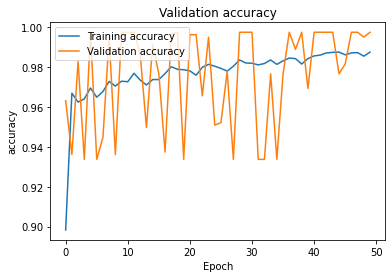

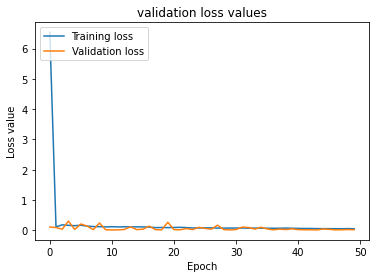

In [41]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [42]:
# Testing the performance of Model
model.evaluate(X_test, y_test)

84/84 [==============================] - 0s 1ms/step - loss: 0.0763 - accuracy: 0.9752


[0.07632336020469666, 0.9752345085144043]

In [43]:
yp = model.predict(X_test)
yp[:5]

array([[0.96681607],
       [0.9674338 ],
       [0.9668193 ],
       [0.9256314 ],
       [0.9203529 ]], dtype=float32)

In [44]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [45]:
y_pred[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [46]:
y_test[:10]

140    1
141    1
142    1
143    1
144    1
145    1
146    1
147    1
148    1
149    1
Name: Occupancy, dtype: int64

In [47]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1693
           1       0.94      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.97      2665
weighted avg       0.98      0.98      0.98      2665



Text(69.0, 0.5, 'Truth')

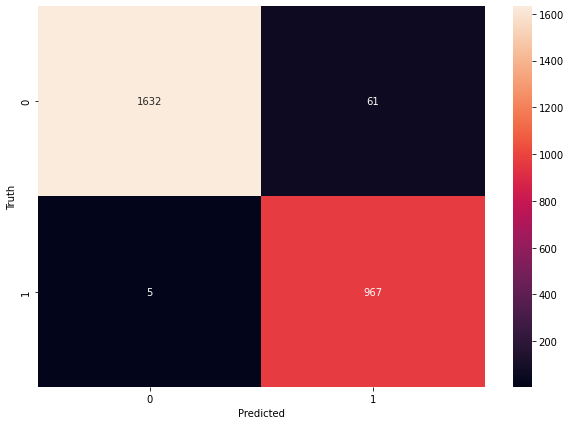

In [48]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy 

In [49]:
round((1632+967)/(2665),2)

0.98